# Suppert Vector Machine for regression 
the main goal of using support vector machine is to identify a possible regressor that can be useful for prediction of the target variable.
the SVM is a very simple classifier and for this reason we have considered its implementation.
SVM provides different types of implementation. We will use different Kernel and different hyperparameters for achive the best score for the model.


Imports

In [ ]:
%matplotlib inline

import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import LinearSVR, SVR, SVC
from sklearn.utils import shuffle
from sklearn import metrics
from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score, f1_score, make_scorer
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Fuction for evaluation the regretion model

In [ ]:
def regression_evaluation(real, pred):
  MSE = metrics.mean_squared_error(real, pred)
  MAE = metrics.mean_absolute_error(real, pred)
  Pearson, p_value = stats.pearsonr(real, pred)
  KStest, p_value = stats.ks_2samp(real, pred)
  print('Mean Squared Error:', round(MSE, 3))
  print('Mean Absolut Error:', round(MAE, 3))
  print('Pearson:', round(Pearson,3))
  print('KS test:', round(KStest,3))

In [ ]:
df = pd.read_csv("/content/data_cleaned.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8197 entries, 0 to 8196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8197 non-null   object 
 1   Rating            8197 non-null   float64
 2   Reviews           8197 non-null   int64  
 3   Size              8197 non-null   float64
 4   Installs          8197 non-null   object 
 5   Price             8197 non-null   float64
 6   Content Rating    8197 non-null   object 
 7   Last Updated      8197 non-null   object 
 8   Current Ver       8197 non-null   object 
 9   Android Ver       8197 non-null   object 
 10  Main_Genres       8197 non-null   object 
 11  Secondary_Genres  8197 non-null   object 
 12  Is_Family         8197 non-null   int64  
 13  Is_Game           8197 non-null   int64  
 14  Compatibility     8197 non-null   object 
 15  RTR               8197 non-null   float64
 16  Both_Stores       8197 non-null   int64  


# Regression

## Building the model

removing unused feature

In [ ]:
df_reg = df.drop(['App'], axis=1)

encoding features for prepare the dataset

In [ ]:
label_encoders = dict()
column2encode = ['Installs',
                 'Content Rating',
                 'Last Updated',
                 'Main_Genres',
                 'Secondary_Genres',
                 'Compatibility',
                 'Android Ver',
                 'Current Ver']

for col in column2encode:
    le = LabelEncoder()
    df_reg[col] = le.fit_transform(df_reg[col])
    label_encoders[col] = le

In [ ]:
df_reg.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver,Main_Genres,Secondary_Genres,Is_Family,Is_Game,Compatibility,RTR,Both_Stores
0,4.7,11661,4.0,6,0.00,1,53,278,14,17,5,0,0,2,0.002914,0
1,4.0,19,3.2,4,0.00,1,74,104,17,42,5,0,0,2,0.000473,0
2,4.6,22098,18.0,6,0.00,1,53,1853,14,39,5,0,0,2,0.005523,0
3,3.8,718,26.0,4,399.99,1,21,108,19,24,5,0,0,2,0.017948,0
4,4.4,190,34.0,4,0.00,1,80,1551,9,12,5,0,0,2,0.004748,0


### Training and test set

In [ ]:
attributes = [col for col in df_reg.columns if col != 'Rating']
X = df_reg[attributes].values
y = df_reg['Rating']

Scaling the X set

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 42)

### Kernel evaluation
using different parameters for identify the best kernel to use for SVM regression. The used parameters are: 

1. 'gamma': [ 'scale', 'auto' ],
2. 'epsilon': [ 0.1, 0.01, 0.001 ],
3. 'C': [ 1, 5, 10 ],
4. 'kernel': [ 'linear', 'poly', 'rbf', 'sigmoid' ].

(Just for make some test).


In [ ]:
parameters = {'gamma': ['scale', 'auto'],
              'epsilon':[0.1, 0.01, 0.001],
              'C': [1, 5, 10],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            }
svr = SVR()
clf_kernel_reg = GridSearchCV(svr, parameters, cv=5, n_jobs = -1, verbose = 30)
clf_kernel_reg.fit(X_train, y_train)
SVRKernel = clf_kernel_reg.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [ ]:
SVRKernel

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Hyperparameter tuning

In [ ]:
parameters = {'gamma': ['scale', 'auto'],
              'tol': [1e-4, 1e-3, 1e-2],
              'epsilon': [0.1, 0.01, 0.001],
              'C': [1, 5, 10, 100, 1000],
              'kernel': ['rbf'],
            }
svr = SVR()
clf_par_reg = GridSearchCV(svr, parameters, cv=5, n_jobs = -1, verbose = 30)
clf_par_reg.fit(X_train, y_train)
SVRparametertuning = clf_par_reg.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

### Model evaluation

In [ ]:
SVRparametertuning

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)

In [ ]:
SVRparametertuning.fit(X_train, y_train)
y_pred = SVRparametertuning.predict(X_test)

In [ ]:
regression_evaluation(y_test, y_pred)

Mean Squared Error: 0.275
Mean Absolut Error: 0.343
Pearson: 0.35
KS test: 0.256


# Regression - Feature selection


## Removing some redundant features
considering to remove the feature that was arledy derived by other features:
1. Installs
2. Reviews


In [ ]:
df_reg_NoRed = df.drop(['App','Installs', 'Reviews'], axis = 1)

encoding features for prepare the dataset

In [ ]:
label_encoders = dict()
column2encode = ['Content Rating',
                 'Last Updated',
                 'Main_Genres',
                 'Secondary_Genres',
                 'Compatibility',
                 'Android Ver',
                 'Current Ver']

for col in column2encode:
    le = LabelEncoder()
    df_reg_NoRed[col] = le.fit_transform(df_reg_NoRed[col])
    label_encoders[col] = le

### Training and test set

In [ ]:
attributes = [col for col in df_reg_NoRed.columns if col != 'Rating']
X = df_reg_NoRed[attributes].values
y = df_reg_NoRed['Rating']

Scaling the X set

### Model evaluation

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 42)

In [ ]:
SVRparametertuning.fit(X_train, y_train)
y_pred = SVRparametertuning.predict(X_test)

In [ ]:
regression_evaluation(y_test, y_pred)

Mean Squared Error: 0.277
Mean Absolut Error: 0.343
Pearson: 0.343
KS test: 0.257


## Feature importance 



In [ ]:
attributes = [col for col in df_reg.columns if col != 'Rating']
X = df_reg[attributes].values
y = df_reg['Rating']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Feature ranking

In [ ]:
estimator = SVR(kernel = 'linear' )
selector = RFECV(estimator, step=1, cv=5, verbose=30)
selector = selector.fit(X, y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting 

In [ ]:
ranking = selector.ranking_ 

In [ ]:
for idx, i in enumerate(df_reg.columns[1:]):
  print('feature:', i ,'->','rank:', ranking[idx])

feature: Reviews -> rank: 4
feature: Size -> rank: 10
feature: Installs -> rank: 11
feature: Price -> rank: 2
feature: Content Rating -> rank: 5
feature: Last Updated -> rank: 6
feature: Current Ver -> rank: 7
feature: Android Ver -> rank: 13
feature: Main_Genres -> rank: 3
feature: Secondary_Genres -> rank: 8
feature: Is_Family -> rank: 9
feature: Is_Game -> rank: 14
feature: Compatibility -> rank: 1
feature: RTR -> rank: 1
feature: Both_Stores -> rank: 12


Selecting the most important features

In [ ]:
df_reg_FI = df.drop(['App', 'Size','Installs','Current Ver','Android Ver','Secondary_Genres','Is_Family','Is_Game','Both_Stores'], axis = 1)

In [ ]:
df_reg_FI.head()

,Rating,Reviews,Price,Content Rating,Last Updated,Main_Genres,Compatibility,RTR
0,4.7,11661,0.00,Everyone,07-2018,Entertainment,Medium,0.002914
1,4.0,19,0.00,Everyone,10-2017,Tools,Medium,0.000473
2,4.6,22098,0.00,Everyone,07-2018,Social,Medium,0.005523
3,3.8,718,399.99,Everyone,03-2018,Lifestyle,Medium,0.017948
4,4.4,190,0.00,Everyone,11-2017,Comics,Medium,0.004748


In [ ]:
label_encoders = dict()
column2encode = ['Content Rating','Last Updated','Main_Genres','Compatibility']

for col in column2encode:
    le = LabelEncoder()
    df_reg_FI[col] = le.fit_transform(df_reg_FI[col])
    label_encoders[col] = le

In [ ]:
df_reg_FI.head()

,Rating,Reviews,Price,Content Rating,Last Updated,Main_Genres,Compatibility,RTR
0,4.7,11661,0.00,1,53,17,2,0.002914
1,4.0,19,0.00,1,74,42,2,0.000473
2,4.6,22098,0.00,1,53,39,2,0.005523
3,3.8,718,399.99,1,21,24,2,0.017948
4,4.4,190,0.00,1,80,12,2,0.004748


### Training and test set

In [ ]:
attributes = [col for col in df_reg_FI.columns if col != 'Rating']
X = df_reg_FI[attributes].values
y = df_reg_FI['Rating']

Scaling the X set

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 42)

In [ ]:
parameters = {'gamma': ['scale', 'auto'],
              'tol': [1e-4, 1e-3, 1e-2],
              'epsilon': [0.1, 0.01, 0.001],
              'C': [1, 5, 10, 15, 20],
              'kernel': ['rbf'],
            }
svr = SVR()
clf_reg_FI = GridSearchCV(svr, parameters, cv=5, n_jobs = -1, verbose = 30)
clf_reg_FI.fit(X_train, y_train)
SVR_FI = clf_reg_FI.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [ ]:
SVR_FI

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)

### Model evaluation

In [ ]:
SVR_FI = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)
SVR_FI.fit(X_train, y_train)
y_pred = SVR_FI.predict(X_test)

In [ ]:
regression_evaluation(y_test, y_pred)

Mean Squared Error: 0.271
Mean Absolut Error: 0.341
Pearson: 0.376
KS test: 0.285


## Spit the Last Update feature

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%m-%Y')

In [ ]:
df['year'] = df['Last Updated'].dt.year

In [ ]:
df['month'] = df['Last Updated'].dt.month

In [ ]:
df_reg_YM = df.drop('App', axis = 1)

In [ ]:
label_encoders = dict()
column2encode = ['Installs',
                 'Content Rating',
                 'Last Updated',
                 'Main_Genres',
                 'Secondary_Genres',
                 'Compatibility',
                 'Android Ver',
                 'Current Ver',
                 'year',
                 'month',
                 ]

for col in column2encode:
    le = LabelEncoder()
    df_reg_YM[col] = le.fit_transform(df_reg_YM[col])
    label_encoders[col] = le

In [ ]:
attributes = [col for col in df_reg_YM.columns if col != 'Rating']
X = df_reg_YM[attributes].values
y = df_reg_YM['Rating']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Feature ranking

In [ ]:
estimator = SVR(kernel = 'linear' )
selector = RFECV(estimator, step=1, cv=5, verbose=30)
selector = selector.fit(X, y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitt

In [ ]:
ranking_YM = selector.ranking_ 

In [ ]:
for idx, i in enumerate(df_reg_YM.columns[1:]):
  print('feature:', i ,'->','rank:', ranking_YM[idx])

feature: Reviews -> rank: 6
feature: Size -> rank: 11
feature: Installs -> rank: 10
feature: Price -> rank: 3
feature: Content Rating -> rank: 2
feature: Last Updated -> rank: 1
feature: Current Ver -> rank: 5
feature: Android Ver -> rank: 13
feature: Main_Genres -> rank: 7
feature: Secondary_Genres -> rank: 8
feature: Is_Family -> rank: 9
feature: Is_Game -> rank: 14
feature: Compatibility -> rank: 4
feature: RTR -> rank: 1
feature: Both_Stores -> rank: 12
feature: year -> rank: 1
feature: month -> rank: 1


In [ ]:
df_reg_YM_FI = df_reg_YM.drop(['Size','Installs','Current Ver','Android Ver','Secondary_Genres','Is_Family','Is_Game','Last Updated','Both_Stores'], axis = 1)

In [ ]:
df_reg_YM_FI.head()

,Rating,Reviews,Price,Content Rating,Main_Genres,Compatibility,RTR,year,month
0,4.7,11661,0.00,1,17,2,0.002914,8,6
1,4.0,19,0.00,1,42,2,0.000473,7,9
2,4.6,22098,0.00,1,39,2,0.005523,8,6
3,3.8,718,399.99,1,24,2,0.017948,8,2
4,4.4,190,0.00,1,12,2,0.004748,7,10


### Training and test set

In [ ]:
attributes = [col for col in df_reg_YM_FI.columns if col != 'Rating']
X = df_reg_YM_FI[attributes].values
y = df_reg_YM_FI['Rating']

Scaling the X set

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 42)

### Model evaluation

In [ ]:
SVR_FI 
SVR_FI.fit(X_train, y_train)
y_pred = SVR_FI.predict(X_test)

In [ ]:
regression_evaluation(y_test, y_pred)

Mean Squared Error: 0.269
Mean Absolut Error: 0.338
Pearson: 0.384
KS test: 0.258


### Charts

In [ ]:
pred_df = pd.DataFrame(data = {"Predicted": np.around(y_pred, decimals=1), "Actual": y_test})
pred_df

,Predicted,Actual
4013,4.1,3.9
1322,4.5,4.4
6202,4.2,4.4
2406,4.2,3.1
7057,4.3,4.4
...,...,...
7791,3.9,4.5
2206,4.2,4.5
170,4.2,3.7
6064,4.1,4.0


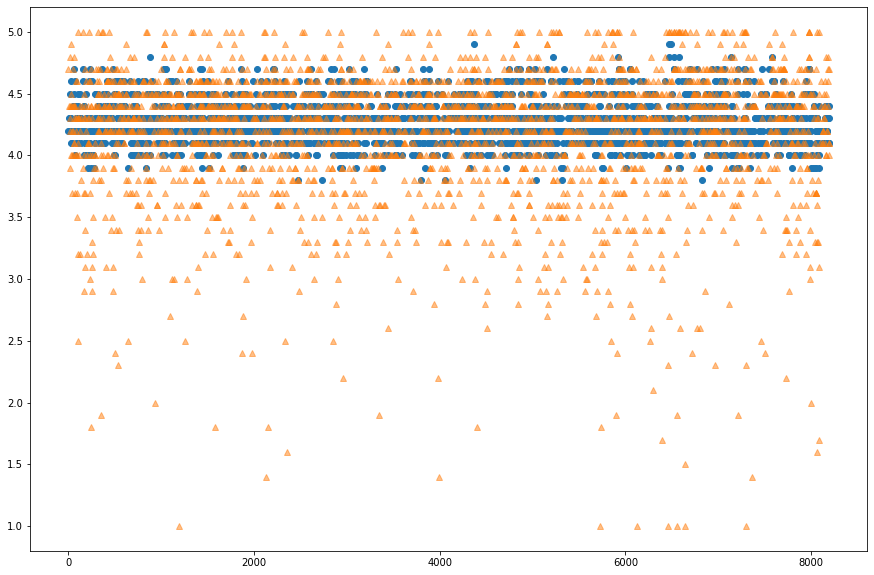

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(pred_df["Predicted"][:], "o")
plt.plot(pred_df['Actual'][:], "^", alpha=0.50)
plt.show()


# Balancing the dataset

In [ ]:
df_reg_YM = df.drop(['App'], axis=1)

encoding features for prepare the dataset

In [ ]:
label_encoders = dict()
column2encode = ['Installs',
                 'Content Rating',
                 'Last Updated',
                 'Main_Genres',
                 'Secondary_Genres',
                 'Compatibility',
                 'Android Ver',
                 'Current Ver',
                 'Rating',
                 'year',
                 'month']

for col in column2encode:
    le = LabelEncoder()
    df_reg_YM[col] = le.fit_transform(df_reg_YM[col])
    label_encoders[col] = le

In [ ]:
df_reg_YM.head(2)

,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver,Main_Genres,Secondary_Genres,Is_Family,Is_Game,Compatibility,RTR,Both_Stores,year,month
0,35,11661,4.0,6,0.0,1,86,278,14,17,5,0,0,2,0.002914,0,8,6
1,28,19,3.2,4,0.0,1,77,104,17,42,5,0,0,2,0.000473,0,7,9


drop the unique rating row

In [ ]:
print('Resampled dataset shape %s' % Counter(df_reg_YM['Rating']))

Resampled dataset shape Counter({31: 895, 32: 894, 33: 851, 30: 812, 34: 684, 29: 623, 28: 513, 35: 439, 27: 359, 26: 286, 38: 271, 25: 224, 36: 220, 24: 167, 23: 156, 22: 126, 21: 100, 37: 85, 18: 81, 19: 69, 20: 63, 17: 45, 16: 40, 15: 23, 14: 23, 13: 20, 11: 20, 12: 19, 0: 16, 10: 14, 7: 12, 8: 12, 6: 8, 9: 8, 5: 8, 4: 4, 2: 3, 3: 3, 1: 1})


In [ ]:
i = df_reg_YM[df_reg_YM['Rating'] == 1].index

In [ ]:
df_reg_YM = df_reg_YM.drop(i)

In [ ]:
attributes = [col for col in df_reg_YM.columns if col != 'Rating']
X = df_reg_YM[attributes].values
y = df_reg_YM['Rating']

Scaling the X set

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Oversampling 

In [ ]:
sm = SMOTE(random_state = 50, k_neighbors = 1)

In [ ]:
X_res, y_res = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({35: 895, 28: 895, 34: 895, 26: 895, 32: 895, 31: 895, 29: 895, 25: 895, 30: 895, 33: 895, 36: 895, 20: 895, 24: 895, 27: 895, 37: 895, 19: 895, 23: 895, 22: 895, 13: 895, 38: 895, 21: 895, 17: 895, 18: 895, 10: 895, 16: 895, 6: 895, 7: 895, 15: 895, 12: 895, 11: 895, 8: 895, 14: 895, 0: 895, 9: 895, 2: 895, 4: 895, 3: 895, 5: 895})


Feature ranking

In [ ]:
estimator = SVR(kernel = 'linear' )
selector = RFECV(estimator, step=1, cv=5, verbose=30)
selector = selector.fit(X_res, y_res)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitt

In [ ]:
ranking = selector.ranking_ 

In [ ]:
for idx, i in enumerate(df_reg_YM.columns[1:]):
  print('feature',idx+1,':', i ,'->','rank:', ranking[idx])

feature 1 : Reviews -> rank: 2
feature 2 : Size -> rank: 5
feature 3 : Installs -> rank: 1
feature 4 : Price -> rank: 7
feature 5 : Content Rating -> rank: 1
feature 6 : Last Updated -> rank: 3
feature 7 : Current Ver -> rank: 1
feature 8 : Android Ver -> rank: 9
feature 9 : Main_Genres -> rank: 8
feature 10 : Secondary_Genres -> rank: 1
feature 11 : Is_Family -> rank: 1
feature 12 : Is_Game -> rank: 1
feature 13 : Compatibility -> rank: 10
feature 14 : RTR -> rank: 1
feature 15 : Both_Stores -> rank: 1
feature 16 : year -> rank: 4
feature 17 : month -> rank: 6


Selecting the most important features
(only ranking 1 features)

In [ ]:
attributes=['Rating', 'Installs', 'Content Ratin','Current Ver','Secondary_Genres','Is_Family' ,'Is_Game','RTR', 'Both_Stores']

In [ ]:
over_df = df_reg_YM.drop([i for i in df_reg.columns if i not in attributes], axis=1)

In [ ]:
over_df.head()

,Rating,Installs,Current Ver,Secondary_Genres,Is_Family,Is_Game,RTR,Both_Stores
0,35,6,278,5,0,0,0.002914,0
1,28,4,104,5,0,0,0.000473,0
2,34,6,1853,5,0,0,0.005523,0
3,26,4,108,5,0,0,0.017948,0
4,32,4,1551,5,0,0,0.004748,0


### Training and test set

In [ ]:
attributes = [col for col in over_df.columns if col != 'Rating']
X = over_df[attributes].values
y = over_df['Rating']

Scaling the X set

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 42)

### Kernel evaluation 

In [ ]:
parameters = {'C': [1, 5, 10, 15, 20],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            }
svr = SVR()
clf_kernel_over = GridSearchCV(svr, parameters, cv=5, n_jobs = -1)
clf_kernel_over.fit(X_train, y_train)
SVRKernel_over = clf_kernel_over.best_estimator_

In [ ]:
SVRKernel_over 

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
regression_evaluation(y_test, y_pred)

Mean Squared Error: 25.725
Mean Absolut Error: 3.404
Pearson: 0.343
KS test: 0.234


In [ ]:
parameters = {'gamma': ['scale'],
              'tol': np.arange(0.0001,0.01,0.01),
              'epsilon': np.arange(0.04, 0.5, 0.01),
              'C': np.arange(5, 40, 2),
              'kernel': ['rbf'],
            }
svr = SVR()
clf_tuning_over = GridSearchCV(svr, parameters, cv=5, n_jobs = -1, verbose = 30)
clf_tuning_over.fit(X_train, y_train)
SVRTuning_over = clf_tuning_over.best_estimator_

Fitting 5 folds for each of 828 candidates, totalling 4140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [ ]:
SVRTuning_over

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.33, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)

### Model evaluation

In [ ]:
SVRTuning_over.fit(X_train, y_train)
y_pred = SVRTuning_over.predict(X_test)

In [ ]:
regression_evaluation(y_test, y_pred)

Mean Squared Error: 28268.763
Mean Absolut Error: 95.937


# Splitting the problem

## Training classificate according to mean

In [ ]:
RatingClass = []
for i in df_reg_YM_FI['Rating']:
  if i > 4.2:
    RatingClass.append('class1')
  else:
    RatingClass.append('class0')

In [ ]:
len([i for i in RatingClass if i == 'class1'])

4339

In [ ]:
len([i for i in RatingClass if i == 'class0'])

3858

In [ ]:
df_reg_YM_FI['RatingClass'] = RatingClass
df_reg_YM_FI.head()

,Rating,Reviews,Price,Content Rating,Main_Genres,Compatibility,RTR,year,month,RatingClass
0,4.7,11661,0.00,1,17,2,0.002914,8,6,class1
1,4.0,19,0.00,1,42,2,0.000473,7,9,class0
2,4.6,22098,0.00,1,39,2,0.005523,8,6,class1
3,3.8,718,399.99,1,24,2,0.017948,8,2,class0
4,4.4,190,0.00,1,12,2,0.004748,7,10,class1


In [ ]:
attributes = [col for col in df_reg_YM_FI.columns if col != 'RatingClass']

In [ ]:
label_encoders = dict()
column2encode = ['Content Rating','Main_Genres','Compatibility']

for col in column2encode:
    le = LabelEncoder()
    df_reg_YM_FI[col] = le.fit_transform(df_reg_YM_FI[col])
    label_encoders[col] = le

In [ ]:
X = df_reg_YM_FI[attributes].values
y = df_reg_YM_FI['RatingClass']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state = 42)



In [ ]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8
0,3.9,2510.0,0.0,2.0,16.0,2.0,0.002508,8.0,6.0
1,4.4,2119235.0,0.0,2.0,0.0,2.0,0.021191,8.0,5.0
2,4.4,47780.0,0.0,1.0,43.0,3.0,0.004776,8.0,6.0
3,3.1,10006.0,0.0,1.0,24.0,2.0,0.002500,8.0,6.0
4,4.4,382.0,0.0,1.0,40.0,2.0,0.009548,8.0,2.0


Splitting Rating feature

In [ ]:
X_test = pd.DataFrame(X_test)
# rating == idx 0
y_test_rating = X_test[0]
X_test = X_test.drop([0], axis=1)
X_test = np.array(X_test)
X_train = pd.DataFrame(X_train)
X_train = X_train.drop([0], axis=1)
X_train = np.array(X_train)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Kernel evaluation

In [ ]:
parameters = {'gamma': ['scale', 'auto'],
              'C': [1, 5, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            }
svc = SVC()
clf_kernel_class = GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy',verbose = 30)
clf_kernel_class.fit(X_train, y_train)
SVCKernel = clf_kernel_class.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=scale, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=1, gamma=scale, kernel=linear, score=0.653, total=   0.6s
[CV] C=1, gamma=scale, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ..... C=1, gamma=scale, kernel=linear, score=0.642, total=   0.6s
[CV] C=1, gamma=scale, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ..... C=1, gamma=scale, kernel=linear, score=0.648, total=   0.6s
[CV] C=1, gamma=scale, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] ..... C=1, gamma=scale, kernel=linear, score=0.610, total=   0.6s
[CV] C=1, gamma=scale, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] ..... C=1, gamma=scale, kernel=linear, score=0.640, total=   0.7s
[CV] C=1, gamma=scale, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


[CV] ....... C=1, gamma=scale, kernel=poly, score=0.606, total=   0.8s
[CV] C=1, gamma=scale, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.9s remaining:    0.0s


[CV] ....... C=1, gamma=scale, kernel=poly, score=0.591, total=   0.8s
[CV] C=1, gamma=scale, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.7s remaining:    0.0s


[CV] ....... C=1, gamma=scale, kernel=poly, score=0.589, total=   0.8s
[CV] C=1, gamma=scale, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.5s remaining:    0.0s


[CV] ....... C=1, gamma=scale, kernel=poly, score=0.561, total=   0.8s
[CV] C=1, gamma=scale, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.3s remaining:    0.0s


[CV] ....... C=1, gamma=scale, kernel=poly, score=0.614, total=   0.9s
[CV] C=1, gamma=scale, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s remaining:    0.0s


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.662, total=   0.9s
[CV] C=1, gamma=scale, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    8.0s remaining:    0.0s


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.639, total=   0.9s
[CV] C=1, gamma=scale, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.9s remaining:    0.0s


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.644, total=   0.8s
[CV] C=1, gamma=scale, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    9.7s remaining:    0.0s


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.624, total=   0.8s
[CV] C=1, gamma=scale, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   10.5s remaining:    0.0s


[CV] ........ C=1, gamma=scale, kernel=rbf, score=0.663, total=   0.9s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   11.4s remaining:    0.0s


[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.593, total=   0.8s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   12.2s remaining:    0.0s


[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.574, total=   0.8s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   13.0s remaining:    0.0s


[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.595, total=   0.8s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   13.9s remaining:    0.0s


[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.579, total=   0.8s
[CV] C=1, gamma=scale, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   14.7s remaining:    0.0s


[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.601, total=   0.9s
[CV] C=1, gamma=auto, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   15.6s remaining:    0.0s


[CV] ...... C=1, gamma=auto, kernel=linear, score=0.653, total=   0.6s
[CV] C=1, gamma=auto, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   16.2s remaining:    0.0s


[CV] ...... C=1, gamma=auto, kernel=linear, score=0.642, total=   0.6s
[CV] C=1, gamma=auto, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   16.8s remaining:    0.0s


[CV] ...... C=1, gamma=auto, kernel=linear, score=0.648, total=   0.6s
[CV] C=1, gamma=auto, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   17.4s remaining:    0.0s


[CV] ...... C=1, gamma=auto, kernel=linear, score=0.610, total=   0.6s
[CV] C=1, gamma=auto, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   18.0s remaining:    0.0s


[CV] ...... C=1, gamma=auto, kernel=linear, score=0.640, total=   0.7s
[CV] C=1, gamma=auto, kernel=poly ....................................


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   18.7s remaining:    0.0s


[CV] ........ C=1, gamma=auto, kernel=poly, score=0.606, total=   0.8s
[CV] C=1, gamma=auto, kernel=poly ....................................


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   19.5s remaining:    0.0s


[CV] ........ C=1, gamma=auto, kernel=poly, score=0.591, total=   0.8s
[CV] C=1, gamma=auto, kernel=poly ....................................


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   20.3s remaining:    0.0s


[CV] ........ C=1, gamma=auto, kernel=poly, score=0.590, total=   0.8s
[CV] C=1, gamma=auto, kernel=poly ....................................


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   21.0s remaining:    0.0s


[CV] ........ C=1, gamma=auto, kernel=poly, score=0.560, total=   0.7s
[CV] C=1, gamma=auto, kernel=poly ....................................


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   21.8s remaining:    0.0s


[CV] ........ C=1, gamma=auto, kernel=poly, score=0.613, total=   0.8s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.659, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.639, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.645, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.624, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.665, total=   0.9s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] ..... C=1, gamma=auto, kernel=sigmoid, score=0.596, total=   0.8s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  3.9min finished


In [ ]:
SVCKernel = clf_kernel_class.best_estimator_

### Hyperparameter tuning

In [ ]:
parameters = {'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1],
              'gamma': ['scale', 'auto'],
              'C': [1, 5, 10, 11, 100],
              'kernel': ['rbf'],
            }
svc = SVC()
clf_par_class = GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy',verbose = 30)
clf_par_class.fit(X_train, y_train)
SVCparametertuning = clf_par_class.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=1, gamma=scale, kernel=rbf, tol=1e-05 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, gamma=scale, kernel=rbf, tol=1e-05, score=0.651, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=1e-05 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=1e-05, score=0.638, total=   0.9s
[CV] C=1, gamma=scale, kernel=rbf, tol=1e-05 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=1e-05, score=0.642, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=1e-05 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=1e-05, score=0.604, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=1e-05 .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=1e-05, score=0.659, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.0001 ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.651, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.0001 ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.638, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.0001 ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.642, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.0001 ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.604, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.0001 ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.0001, score=0.659, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.001 .........................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.001, score=0.651, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.001 .........................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   11.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.001, score=0.638, total=   0.9s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.001 .........................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   12.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.001, score=0.642, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.001 .........................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   13.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.001, score=0.604, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.001 .........................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   14.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.001, score=0.659, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.01 ..........................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   15.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.01, score=0.652, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.01 ..........................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   16.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.01, score=0.638, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.01 ..........................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   17.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.01, score=0.642, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.01 ..........................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   18.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.01, score=0.604, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.01 ..........................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   19.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.01, score=0.657, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.1 ...........................


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   20.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.1, score=0.652, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.1 ...........................


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   21.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.1, score=0.639, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.1 ...........................


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   22.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.1, score=0.643, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.1 ...........................


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   23.0s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.1, score=0.605, total=   1.0s
[CV] C=1, gamma=scale, kernel=rbf, tol=0.1 ...........................


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   23.9s remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, tol=0.1, score=0.658, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=1e-05 ..........................


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   24.9s remaining:    0.0s


[CV]  C=1, gamma=auto, kernel=rbf, tol=1e-05, score=0.653, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=1e-05 ..........................


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   25.9s remaining:    0.0s


[CV]  C=1, gamma=auto, kernel=rbf, tol=1e-05, score=0.639, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=1e-05 ..........................


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   26.9s remaining:    0.0s


[CV]  C=1, gamma=auto, kernel=rbf, tol=1e-05, score=0.642, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf, tol=1e-05 ..........................


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   27.8s remaining:    0.0s


[CV]  C=1, gamma=auto, kernel=rbf, tol=1e-05, score=0.604, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=1e-05 ..........................


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   28.8s remaining:    0.0s


[CV]  C=1, gamma=auto, kernel=rbf, tol=1e-05, score=0.659, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.653, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.639, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.642, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.604, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=auto, kernel=rbf, tol=0.0001, score=0.659, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf, tol=0.001 ..........................
[CV]  C=1, gamma=auto, kernel=rbf, tol=0.001, score=0.653, total=   0.9s
[CV] C=1, gamma=auto, kernel=rbf, tol=0.001 ..............

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.7min finished


In [ ]:
SVCparametertuning

SVC(C=11, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

In [ ]:
SVCparametertuning.fit(X_train, y_train)
y_pred = SVCparametertuning.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.65
F1-score [0.61233679 0.68099296]
              precision    recall  f1-score   support

      class0       0.62      0.60      0.61      1132
      class1       0.67      0.69      0.68      1328

    accuracy                           0.65      2460
   macro avg       0.65      0.65      0.65      2460
weighted avg       0.65      0.65      0.65      2460



## Training Regressors models

In [ ]:
df_above = df_reg_YM_FI[df_reg_YM_FI['Rating'] > 4.2] 
df_below = df_reg_YM_FI[df_reg_YM_FI['Rating'] <= 4.2]

prepare test set

In [ ]:
attributes = [col for col in df_above.columns if col != 'Rating' and col != 'RatingClass']

In [ ]:
X_above = df_above[attributes].values
y_above = df_above['Rating']
X_train_above, nan_test, y_train_above, nan_test = train_test_split(X_above, y_above, 
                                                    test_size=0.3, 
                                                    random_state = 42)

In [ ]:
parameters = {'gamma': ['scale', 'auto'],
              'tol': [1e-4, 1e-3, 1e-2],
              'epsilon': [0.1, 0.01, 0.001],
              'C': [1, 2, 3, 5, 10],
              'kernel': ['rbf'],
            }
svr = SVR()
clf_upper = GridSearchCV(svr, parameters, cv=5, n_jobs = -1, verbose = 30)
clf_upper.fit(X_train_above, y_train_above)
SVR_UP = clf_upper.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [ ]:
SVR_UP

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)

In [ ]:
X_below = df_below[attributes].values
y_below = df_below['Rating']
X_train_below, nan_test, y_train_below, nan_test = train_test_split(X_below, y_below, 
                                                    test_size=0.3, 
                                                    random_state = 42)

In [ ]:
parameters = {'gamma': ['scale', 'auto'],
              'tol': [1e-4, 1e-3, 1e-2],
              'epsilon': [0.1, 0.01, 0.001],
              'C': [1, 2, 3, 5, 10],
              'kernel': ['rbf'],
            }
svr = SVR()
clf_down = GridSearchCV(svr, parameters, cv=5, n_jobs = -1, verbose = 30)
clf_down.fit(X_train_below, y_train_below)
SVR_DOWN = clf_down.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [ ]:
SVR_DOWN

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)

In [ ]:
X_test_Class = pd.concat([pd.DataFrame(X_test), pd.DataFrame(data = {'Pred': y_pred}), pd.DataFrame(data = {'Rating': y_test_rating})], axis=1)
X_test_above = X_test_Class[X_test_Class['Pred'] == 'class1']
y_test_above = np.array(X_test_above['Rating'])
X_test_above = np.array(X_test_above.drop(['Rating', 'Pred'], axis=1))
X_test_below = X_test_Class[X_test_Class['Pred'] == 'class0']
y_test_below = np.array(X_test_below['Rating'])
X_test_below = np.array(X_test_below.drop(['Rating','Pred'], axis=1))

In [ ]:
X_test_Class

,0,1,2,3,4,5,6,7,Pred,Rating
0,-0.115679,-0.054827,0.569884,-0.647850,0.221786,-0.287546,0.550393,0.262892,class0,3.9
1,0.794633,-0.054827,0.569884,-1.856465,0.221786,0.304296,0.550393,-0.126695,class1,4.4
2,-0.096211,-0.054827,-0.449690,1.391689,1.447839,-0.215698,0.550393,0.262892,class1,4.4
3,-0.112456,-0.054827,-0.449690,-0.043542,0.221786,-0.287815,0.550393,0.262892,class1,3.1
4,-0.116595,-0.054827,-0.449690,1.165073,0.221786,-0.064524,0.550393,-1.295458,class1,4.4
...,...,...,...,...,...,...,...,...,...,...
2455,-0.116708,-0.054827,-0.449690,-0.723388,0.221786,-0.273607,-2.056733,0.652480,class0,4.5
2456,-0.116748,-0.054827,-0.449690,0.636304,0.221786,-0.176986,-0.318649,0.262892,class0,4.5
2457,-0.114368,-0.054827,-0.449690,-0.270157,0.221786,-0.190956,-1.187691,-1.295458,class0,3.7
2458,-0.116530,-0.054827,-0.449690,-0.647850,-2.230320,-0.324928,-0.318649,-0.126695,class0,4.0


In [ ]:
SVR_UP = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)
SVR_UP.fit(X_train_above, y_train_above)
yUppred = SVR_UP.predict(X_test_above)
regression_evaluation(y_test_above, yUppred)

Mean Squared Error: 0.276
Mean Absolut Error: 0.332
Pearson: 0.042
KS test: 0.718


In [ ]:
SVR_DOWN = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.01, verbose=False)
SVR_DOWN.fit(X_train_below, y_train_below)
yDpred = SVR_DOWN.predict(X_test_below)
regression_evaluation(y_test_below, yDpred)

## Model evaluation

In [ ]:
y_pred = np.concatenate((yUppred, yDpred), axis=0)
y_test = np.concatenate((y_test_above, y_test_below), axis=0)

In [ ]:
regression_evaluation(y_test, y_pred)

Mean Squared Error: 0.325
Mean Absolut Error: 0.404
Pearson: 0.265
KS test: 0.355
